In [1]:
OPENSLIDE_PATH = r"C:\Users\MS\openslide-bin-4.0.0.8-windows-x64\bin"

import os

if hasattr(os, "add_dll_directory"):
    # Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
    print(openslide.__version__)
else:
    print("nope")
    import openslide

1.3.1


In [2]:
import xml.etree.ElementTree as ET
from asap_loader.annotation.objects.rectangle import Rectangle
from asap_loader.annotation.objects.group import Group
from pathlib import Path
from os import listdir

ROOT = "C:\\Users\\MS\\Desktop\\IDEAS\\Projekty\\CD34\\Dane\\CD34_adnotacje_final"

filenames = listdir(ROOT)
filename = "22_21450A1_7"
# filename = "22_09617A1_7"
xml_path = Path(ROOT, f"{filename}.xml")

tree = ET.parse(xml_path)
root = tree.getroot()

In [3]:
def get_annotation_groups(root):
    # group_names = set()
    groups = []

    for child in root.find("./AnnotationGroups"):
        group_data = {}

        # group_names.add(child.attrib["Name"])
        group_data["name"] = child.attrib["Name"]
        group_data["color"] = child.attrib["Color"]
        group_data["group"] = (
            None
            if child.attrib["PartOfGroup"] == "None"
            else child.attrib["PartOfGroup"]
        )

        group = Group(**group_data)
        groups.append(group)

    return groups

annotation_groups = get_annotation_groups(root)
print(len(annotation_groups))

6


In [4]:
import pandas as pd

df = pd.read_excel("..\data\średnice_new.xlsx")
df["Średnica Najdłuższej"] = df["Średnica Najdłuższej"] / 0.25
df["Średnica Najszerszej"] = df["Średnica Najszerszej"] / 0.25

df

,Pliki,Typ komórki,Średnica Najdłuższej,Średnica Najszerszej
0,22_09617A1_7.xml,Mieloblasty,45.400,NaN
1,22_09617A1_7.xml,Mieloblasty,31.212,NaN
2,22_09617A1_7.xml,Mieloblasty,40.280,NaN
3,22_09617A1_7.xml,Mieloblasty,24.556,NaN
4,22_09617A1_7.xml,Mieloblasty,39.860,NaN
...,...,...,...,...
235,23_17699A1_7.xml,Naczynia,73.240,46.560
236,23_17699A1_7.xml,Naczynia,65.920,19.140
237,23_17699A1_7.xml,Naczynia,104.040,16.996
238,23_17699A1_7.xml,Naczynia,94.000,41.760


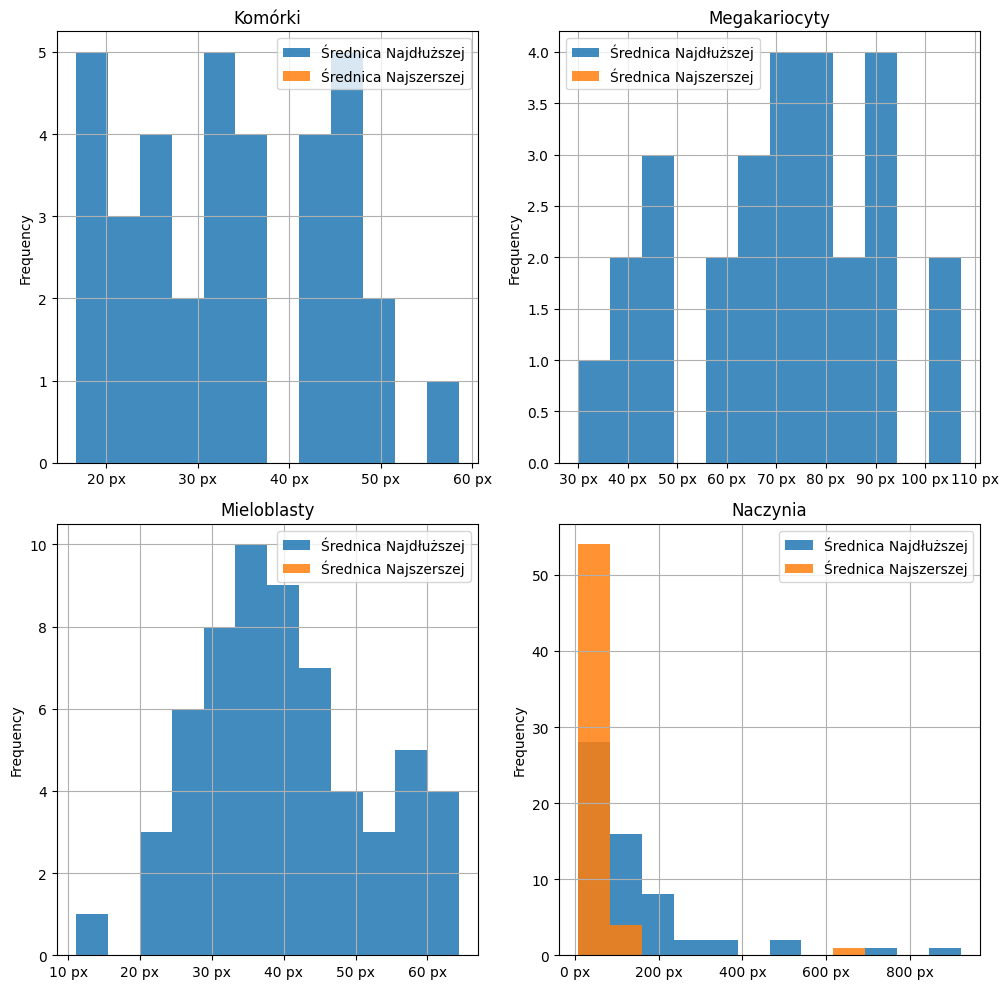

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

groups = df[["Typ komórki", "Średnica Najdłuższej", "Średnica Najszerszej"]].groupby(
    "Typ komórki"
)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5 * 2))
axes = axes.flatten()

for ax, (name, group) in zip(axes, groups):
    group[["Średnica Najdłuższej", "Średnica Najszerszej"]].plot.hist(
        bins=12, alpha=0.85, ax=ax
    )
    ax.set_title(str(name))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d px"))
    ax.grid(True)


plt.tight_layout()
plt.show()

In [6]:
stats = df.groupby("Typ komórki")[["Średnica Najdłuższej", "Średnica Najszerszej"]].agg(
    mean=("Średnica Najdłuższej", "mean"),
    min=("Średnica Najdłuższej", "min"),
    max=("Średnica Najdłuższej", "max"),
    q60=("Średnica Najdłuższej", lambda x: x.quantile(0.60)),
    mean2=("Średnica Najszerszej", "mean"),
    min2=("Średnica Najszerszej", "min"),
    max2=("Średnica Najszerszej", "max"),
    q60_2=("Średnica Najszerszej", lambda x: x.quantile(0.60)),
)

stats

,mean,min,max,q60,mean2,min2,max2,q60_2
Typ komórki,,,,,,,,
Komórki,33.790057,16.680,58.52,36.4608,NaN,NaN,NaN,NaN
Megakariocyty,70.794963,30.000,107.20,77.4720,NaN,NaN,NaN,NaN
Mieloblasty,40.103800,11.100,64.36,41.5120,NaN,NaN,NaN,NaN
Naczynia,150.051400,26.076,922.00,110.4160,46.234237,7.28,664.4,37.4568


In [15]:
stats = df.groupby("Typ komórki")[["Średnica Najdłuższej", "Średnica Najszerszej"]].agg(
    ["mean", "min", "max", lambda x: x.quantile(0.75)]
)

# print(stats.columns)
stats.columns = [
    f"{col}_{'q75' if stat=='<lambda_0>' else stat}" for col, stat in stats.columns
]

stats

,Średnica Najdłuższej_mean,Średnica Najdłuższej_min,Średnica Najdłuższej_max,Średnica Najdłuższej_q75,Średnica Najszerszej_mean,Średnica Najszerszej_min,Średnica Najszerszej_max,Średnica Najszerszej_q75
Typ komórki,,,,,,,,
Komórki,33.790057,16.680,58.52,44.10,NaN,NaN,NaN,NaN
Megakariocyty,70.794963,30.000,107.20,85.76,NaN,NaN,NaN,NaN
Mieloblasty,40.103800,11.100,64.36,49.08,NaN,NaN,NaN,NaN
Naczynia,150.051400,26.076,922.00,168.80,46.234237,7.28,664.4,45.82


In [16]:
from asap_loader.annotation.objects.rectangle import Rectangle
from asap_loader.annotation.objects.polygon import Polygon
from asap_loader.annotation.objects.point import Point

print(annotation_groups)
group_dict = {gr.name: gr for gr in annotation_groups}
print(group_dict)


for annotation in root.find("./Annotations"):
    if annotation.attrib["Type"] == "Dot":
        coord = annotation.find("./Coordinates/Coordinate")
        point = Point(
            group=group_dict[annotation.attrib["PartOfGroup"]],
            name=annotation.attrib["Name"],
            color=annotation.attrib["Color"],
            x=float(coord.attrib["X"]),
            y=float(coord.attrib["Y"]),
        )
        # print(f"dot: {point}")

    elif annotation.attrib["Type"] in ("Polygon", "Spline", "PointSet"):
        coords = annotation.findall("./Coordinates/Coordinate")

        # for coord in coords
        vertices = [
            (float(coord.attrib["X"]), float(coord.attrib["Y"])) for coord in coords
        ]
        polygon = Polygon(
            group=group_dict[annotation.attrib["PartOfGroup"]],
            name=annotation.attrib["Name"],
            color=annotation.attrib["Color"],
            vertices=vertices,
        )
        print(f"{annotation.attrib['Type']}: {polygon.centeroid()}")

    elif annotation.attrib["Type"] == "Rectangle":
        coords = annotation.findall("./Coordinates/Coordinate")
        
        vertices = [
            (float(coord.attrib["X"]), float(coord.attrib["Y"])) for coord in coords
        ]
        xs, ys = zip(*vertices)

        rect = Rectangle(
            group=group_dict[annotation.attrib["PartOfGroup"]],
            name=annotation.attrib["Name"],
            color=annotation.attrib["Color"],
            x_max=max(xs),
            x_min=min(xs),
            y_max=max(ys),
            y_min=min(ys)
        )
        print(f"Rectangle: {rect.centeroid()}")

    else:
        assert False

[Group(name='Mieloblasty', color='#00aa00', group=None, members=[]), Group(name='Megakariocyty', color='#ff0000', group=None, members=[]), Group(name='Naczynia', color='#0055ff', group=None, members=[]), Group(name='Obszary', color='#ffaa00', group=None, members=[]), Group(name='Artefakty', color='#ff00ff', group=None, members=[]), Group(name='komorki', color='#ffff00', group=None, members=[])]
{'Mieloblasty': Group(name='Mieloblasty', color='#00aa00', group=None, members=[]), 'Megakariocyty': Group(name='Megakariocyty', color='#ff0000', group=None, members=[]), 'Naczynia': Group(name='Naczynia', color='#0055ff', group=None, members=[]), 'Obszary': Group(name='Obszary', color='#ffaa00', group=None, members=[]), 'Artefakty': Group(name='Artefakty', color='#ff00ff', group=None, members=[]), 'komorki': Group(name='komorki', color='#ffff00', group=None, members=[])}
Rectangle: (26937.79105, 106045.2855)
Spline: (27338.14115668533, 105862.61630288431)
Spline: (27053.72122720278, 105809.4267

In [17]:
print(len(group_dict["Naczynia"].members))
for i, poly in enumerate(group_dict["Mieloblasty"].members):
    print(i, poly)

65
0 Point(name='Annotation 4', color='#F4FA58', group=Group(name='Mieloblasty', color='#00aa00', group=None, members=[..., Point(name='Annotation 5', color='#F4FA58', group=..., x=27135.9355, y=105681.453), Point(name='Annotation 6', color='#F4FA58', group=..., x=27309.9375, y=105713.094), Point(name='Annotation 7', color='#F4FA58', group=..., x=26817.0703, y=106156.008), Point(name='Annotation 8', color='#F4FA58', group=..., x=26621.4238, y=106394.109), Point(name='Annotation 9', color='#F4FA58', group=..., x=27440.6465, y=106401.602), Point(name='Annotation 10', color='#F4FA58', group=..., x=27031.0352, y=105717.258), Point(name='Annotation 25', color='#F4FA58', group=..., x=26447.8516, y=105708.891), Point(name='Annotation 26', color='#F4FA58', group=..., x=26894.6953, y=105913.625), Point(name='Annotation 46', color='#F4FA58', group=..., x=28005.709, y=106264.141), Point(name='Annotation 47', color='#F4FA58', group=..., x=28051.6621, y=106187.703), Point(name='Annotation 48', colo